## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

Stud_df=pd.read_csv("students-data.csv",delimiter = ';')

In [4]:
Stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
Stud_df.shape

(395, 33)

In [6]:
Stud_df['number'] = np.arange(0,395)
Stud_df=pd.DataFrame(Stud_df).set_index('number')
Stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
# sample of data to drop if any missing values are there
print("Total missing values in Student database is = " + str(Stud_df.isnull().sum().sum()))

Total missing values in Student database is = 0


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [8]:
Stud_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [9]:
Stud_df.select_dtypes(exclude=['int64']).columns.tolist()

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [10]:
#variance of each numerical independent variable
Stud_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [11]:
#droping independent variables whose variance is less than 1
Stud_df=Stud_df.drop(Stud_df.var()[Stud_df.var() < 1].index.values, axis=1)
Stud_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


# Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in range(0,Stud_df.shape[1]):
    if Stud_df.dtypes[i]=='object':
        Stud_df[Stud_df.columns[i]] = le.fit_transform(Stud_df[Stud_df.columns[i]])
Stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


# Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [13]:
Grade = ['G1','G2','G3']
for i in Grade:
    Stud_df[i] = np.where(Stud_df[i]>=10, 'Pass', 'Fail')
Stud_df.head() 




,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,Fail,Fail,Fail
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,Fail,Fail,Fail
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,Fail,Fail,Pass
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,Pass,Pass,Pass
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,Fail,Pass,Pass


In [14]:
# Encoding "Pass" and "Fail" to binary values
var_mod = ['G1','G2','G3']
le = LabelEncoder()
for i in var_mod:
    Stud_df[i] = le.fit_transform(Stud_df[i])
Stud_df.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [15]:
X = Stud_df.drop('G3', axis = 1)
y = Stud_df['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

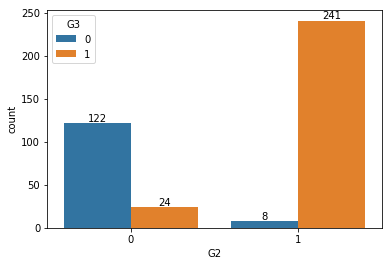

In [16]:
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
ax = sns.countplot(x="G2", hue="G3", data=Stud_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center") 

 ###  insights
- When 146(122+24) students fail in G2(total count of 0 on x axis) 122 students fail (count on 0th bar) & 24 pass in G3      

- When 249(8+241) students pass in G2(total count of 1 on x axis) 241 students Pass (count on 1th bar) & 8 fail in G3

- from above count we can say that G3 highly depends on G2.Thus G2 is good predictor of G3.


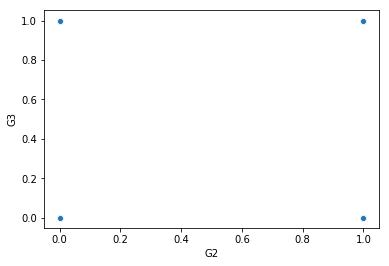

In [17]:
sns.scatterplot(x=Stud_df['G2'], y=Stud_df['G3']);


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

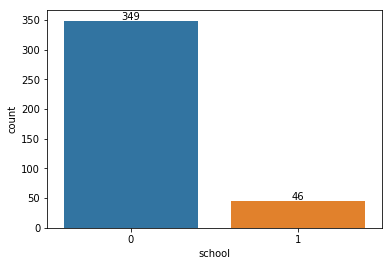

In [18]:
ax = sns.countplot(x="school", data=Stud_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2,'{0:0}'.format(height),ha="center") 

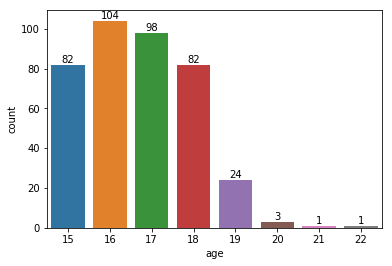

In [19]:
ax = sns.countplot(x="age", data=Stud_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,'{0:0}'.format(height),ha="center") 

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=20)

In [21]:
X_train.shape

(300, 26)

In [22]:
X_test.shape

(95, 26)

In [23]:
y_test.shape

(95,)

In [24]:
y_train.shape

(300,)

# Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [25]:
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()
logRegr.fit(X_train, y_train)
predictions = logRegr.predict(X_test)

In [26]:
#Accuracy of Training and test sets
score_train = logRegr.score(X_train, y_train)
print("Training Accuracy",score_train)
score_test = logRegr.score(X_test, y_test)
print("Testing Accuracy",score_test)


Training Accuracy 0.9166666666666666
Testing Accuracy 0.9052631578947369


testing accuracy is 0.90 means our model is approx. 90% accurate. (out of total 100 observations 90 observations predicted correctly.
for each 100 student it classified, 90 were correctly classified as pass or fail.

In [27]:
#F1 score of  Test sets.
from sklearn.metrics import f1_score
f1_score(y_test,predictions)

0.9291338582677166


 F1 score is high, i.e., both precision and recall of the classifier indicate good results.

# Naive bayes with Iris data

### Import Iris.csv

In [28]:
df=pd.read_csv("iris.csv")

In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [31]:
df.shape

(152, 6)

In [32]:
df.isnull().any()

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm     True
PetalWidthCm      True
Species          False
dtype: bool

In [33]:
# Replacing NaN with columns median value
df=df.fillna(df.median())
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.20,2.0,Iris-virginica
148,149,6.2,3.4,5.40,2.3,Iris-virginica
149,150,5.9,3.0,5.10,1.8,Iris-virginica
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


In [34]:
#labeling of Target Variable
from sklearn.preprocessing import LabelEncoder
count=LabelEncoder()
df["Species"]=count.fit_transform(df["Species"])
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,0
72,73,6.3,2.5,4.9,1.5,1
123,124,6.3,2.7,4.9,1.8,2
88,89,5.6,3.0,4.1,1.3,1
104,105,6.5,3.0,5.8,2.2,2
31,32,5.4,3.4,1.5,0.4,0
33,34,5.5,4.2,1.4,0.2,0
67,68,5.8,2.7,4.1,1.0,1
38,39,4.4,3.0,1.3,0.2,0
79,80,5.7,2.6,3.5,1.0,1


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [35]:
X_df=df.drop(columns=['Species','Id'])
y_df=df['Species']

### Find the distribution of target variable (Class)

In [36]:
df['Species'].value_counts()

2    52
1    50
0    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

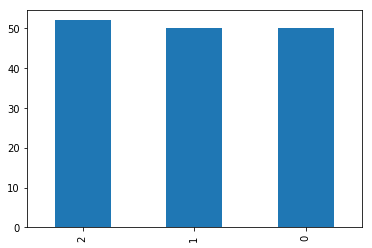

In [38]:
pd.value_counts(df["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

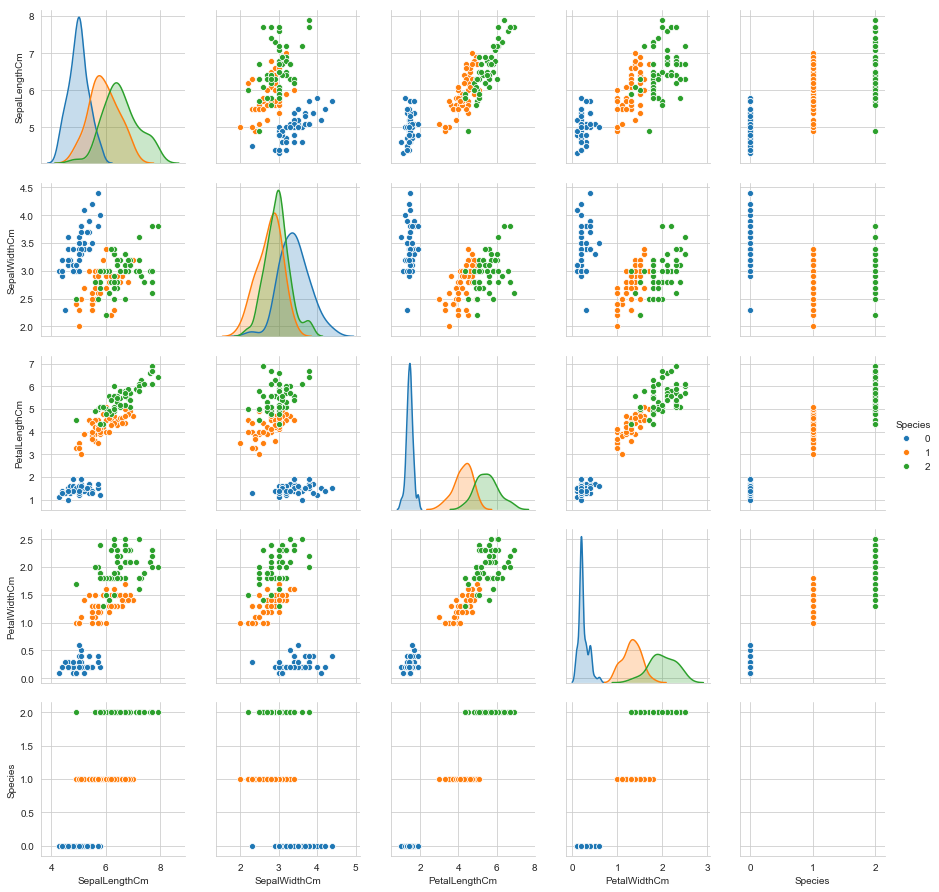

In [39]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(df.drop("Id", axis=1), hue='Species');


#### Insights 
    Fore varibles SepalLength(SL), SepalWidth(SW), PetalLength(PL), PetalWidth are compare in pairplot.
- Plot(SL,SW) -> Setosa(0) flowers are well seperated from Versicolor(1) and Virnica(2). 
- Plot(PL,PW) -> Petal_length & Petal_width are the most useful features to identify various flower types.
- Setosa can be easily identified (linearly Seperable), Versicolor & Virnica have some overlap(almost linearly Seperable).
- we can find lines & 'if-else' conditions to build a simple model to classify flower types.
        from plot(PL,PW) Model if(PL ≤ 2 & PW ≤ 1) flower is setosa
                               elseif(PW ≤ 2 & PW ≥ 1) & (PL < 5 & PL > 2.5) then Versicolour
                               else Virnica

### Summary Statistics and explain insights for at least 2 variables

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5
Species,152.0,1.013158,0.821780,0.0,0.00,1.00,2.00,2.0


## Insights

#### Distribution 
- SepalLength -> mean of sepallength = 5.84 and median(50% quartile value) = 5.80 
as mean and median both are appro. same means SepalLength is having symmetrical distribution.
- SepalWidth -> mean = 3.05 and median = 3.00. Symmetrical distribution 
- PetalLength -> mean =3.75 and median = 4.35. As mean < median, it is Negative/Left Skewed.

#### Outliers 
- SepalLength -> Q1-1.5IQR= 3.15 < min value(4.3) Means Outliers Present in low end distribution.
                 Q3+1.5IQR= 8.35 > max value(7.9) Means Outliers Present in high end distribution.
- SepalWidth ->  Q1-1.5IQR= 2.05 > min value(2.0) Means no Outliers Present in low end distribution.
                 Q3+1.5IQR= 4.05 < max value(4.4) Means no Outliers Present in low end distribution.
               
               



### Correlation among all variables and give your insights

In [40]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


#### Insights 
  - SepalWidth is negatively correlated to all others attributes. 
  - The Petalwidth & PedalLength is higthly correlated with Species, so PedalWidth & PedalLength  can be a good predictor of the outcome variable Species


### Split data in Training and Validation in 80:20

In [41]:
from sklearn.model_selection import train_test_split
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size=0.20, random_state=1)

### Do Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_df_train)
scaledX_test = sc.transform(X_df_test)

### Train and Fit NaiveBayes Model

In [43]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(scaledX_train, y_df_train)
print(model)
# make predictions
predicted = model.predict(scaledX_test)
# summarize the fit of the model
print(metrics.classification_report(y_df_test, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



- Precision -> for all instances classified positive, 100% are correct.
- Recall -> for all instances that were actually positive, 100% classified correctly.
- F1 score -> F1 score is 1, i.e., both precision and recall of the classifier indicate good results.
- supports -> Support is the number of actual occurrences of the class in the specified dataset.


### Print Accuracy and Confusion Matrix and Conclude your findings

In [44]:
#Accuracy of Training and test sets
score_train_df = model.score(scaledX_train, y_df_train)
print("Training Accuracy",score_train_df)
score_test_df = model.score(scaledX_test, y_df_test)
print("Testing Accuracy",score_test_df)

Training Accuracy 0.9338842975206612
Testing Accuracy 1.0


In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_df_test,predicted)
print(cm)

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


From the above confusion_matrix, we can observe that the model classified all the flowers correctly as all elements of matrix other than diagonal elements are zero.

In [46]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            


Correct predictions:  31
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


#### Findings
  - Based on this preliminary exploratory analysis of the iris data set, it would appear that the Iris-setosa species is most distinguishable particularly in terms of its petal length and width. In comparison, the Iris-versicolor and Iris-virginica species were closer to one another on every feature explored.
  ##### Naive Bayes Summary
       - To make a prediction
             Calculates conditional probability of a class,model classified all the flowers correctly with 100% correct       predictions 